# Conway's life and games

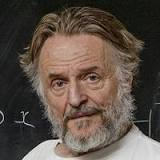

## Conway's Life

Some of his achievements:
 
* Game of Life
* Surreal numbers
* Free Will Theorem

## Game of Life


<img style="height: 600px" src="https://raw.githubusercontent.com/marcoemrich/game-of-life-rules/master/gol_rules.png">

In [8]:
%pylab inline
from pylab import rc

import numpy as np
import scipy
from IPython.display import HTML
from matplotlib import animation

rc('animation', html='html5')

Populating the interactive namespace from numpy and matplotlib


In [17]:
def life_step(X):
    """Game of life step using scipy tools"""
    from scipy.signal import convolve2d
    nbrs_count = convolve2d(X, np.ones((3, 3)), mode='same', boundary='wrap') - X
    return (nbrs_count == 3) | (X & (nbrs_count == 2))

In [175]:
def life_animation(X, dpi=120, fps=30, frames=10, interval=300, mode='loop', save=None):
    """Produce a Game of Life Animation
    
    Parameters
    ----------
    X : array_like
        a two-dimensional numpy array showing the game board
    dpi : integer
        the number of dots per inch in the resulting animation.
        This controls the size of the game board on the screen
    frames : integer
        The number of frames to compute for the animation
    interval : float
        The time interval (in milliseconds) between frames
    mode : string
        The default mode of the animation.  Options are ['loop'|'once'|'reflect']
    """
    X = np.asarray(X)
    assert X.ndim == 2
    X = X.astype(bool)
    
    X_blank = np.zeros_like(X)
#     figsize = (X.shape[1] * 1. / dpi, X.shape[0] * 1. / dpi)
#     print(figsize, dpi)

    fig = plt.figure(dpi=dpi);
    plt.close()
    ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
    im = ax.imshow(X, cmap=plt.cm.binary, interpolation='nearest')
    im.set_clim(-0.05, 1)  # Make background gray
    orig = X.copy()
    # initialization function: plot the background of each frame
    def init():
        im.set_data(orig)
        animate.X = orig
        return (im,)

    # animation function.  This is called sequentially
    def animate(i):
        im.set_data(animate.X)
        animate.X = life_step(animate.X)
        return (im,)

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=frames, interval=interval,
                                   blit=True)
    
    #print anim_to_html(anim)
    htmlcode = anim.to_jshtml(default_mode=mode)
    if save:
        anim.save(save+'.gif', writer='imagemagick', fps=fps)
    return HTML(htmlcode)


def pattern(*figs, height=50, width=70):
    '''Concatenate different patterns into a single board'''
    X = np.zeros((height, width))  
    for patt, x0, y0 in figs:
        X[y0:y0+len(patt), x0:x0+len(patt[0])] = patt
    return X

In [110]:
np.random.seed(0)
X = np.zeros((30, 40), dtype=bool)
r = np.random.random((10, 20))
X[10:20, 10:30] = (r > 0.75)
life_animation(X, dpi=120, frames=40, mode='once')

### Static configurations

In [111]:
X = np.zeros((6, 21))
X[2:4, 1:3] = 1
X[1:4, 5:9] = [[0, 1, 1, 0],
               [1, 0, 0, 1],
               [0, 1, 1, 0]]
X[1:5, 11:15] = [[0, 1, 1, 0],
                 [1, 0, 0, 1],
                 [0, 1, 0, 1],
                 [0, 0, 1, 0]]
X[1:4, 17:20] = [[1, 1, 0],
                 [1, 0, 1],
                 [0, 1, 0]]

life_animation(X, dpi=120, frames=3)

### The "Blinker" and the "Toad" (Period-2 oscillators)


In [112]:
blinker = [[1, 1, 1]]
toad = [[1, 1, 1, 0],
        [0, 1, 1, 1]]


X = pattern((blinker, 1, 1),
            (toad, 6, 1), width=10, height=4)

life_animation(X, frames=4)

### The pulsar (period-3)

In [113]:
X = np.zeros((17, 17))
X[2, 4:7] = 1
X[4:7, 7] = 1
X += X.T
X += X[:, ::-1]
X += X[::-1, :]
pulsar = X.copy()
life_animation(X, frames=6)

### The glider (period-4 oscillator that moves)

In [176]:
glider = [[1, 0, 0],
          [0, 1, 1],
          [1, 1, 0]]
life_animation(pattern((glider, 0,0), width=8, height=8), frames=32, interval=100)

### The Glider Gun (Unbounded growth)

In [177]:
glider_gun =\
[[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

life_animation(pattern((glider_gun, 1, 1)), frames=180, interval=50, mode='once')

### Logic

In [164]:
reverse_gun = [i[::-1] for i in glider_gun]

In [165]:
life_animation(pattern((glider_gun, 1, 1), (reverse_gun, 46, 1), width=100, height=100), frames=180, interval=50, mode='once')

### Other patterns

In [52]:
diehard = [[0, 0, 0, 0, 0, 0, 1, 0],
           [1, 1, 0, 0, 0, 0, 0, 0],
           [0, 1, 0, 0, 0, 1, 1, 1]]

boat = [[1, 1, 0],
        [1, 0, 1],
        [0, 1, 0]]

r_pentomino = [[0, 1, 1],
               [1, 1, 0],
               [0, 1, 0]]

beacon = [[0, 0, 1, 1],
          [0, 0, 1, 1],
          [1, 1, 0, 0],
          [1, 1, 0, 0]]

acorn = [[0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [1, 1, 0, 0, 1, 1, 1]]

spaceship = [[0, 0, 1, 1, 0],
             [1, 1, 0, 1, 1],
             [1, 1, 1, 1, 0],
             [0, 1, 1, 0, 0]]

block_switch_engine = [[0, 0, 0, 0, 0, 0, 1, 0],
                       [0, 0, 0, 0, 1, 0, 1, 1],
                       [0, 0, 0, 0, 1, 0, 1, 0],
                       [0, 0, 0, 0, 1, 0, 0, 0],
                       [0, 0, 1, 0, 0, 0, 0, 0],
                       [1, 0, 1, 0, 0, 0, 0, 0]]

In [178]:
life_animation(pattern((block_switch_engine, 10, 10)), frames=100, interval=50, mode='once')

### Fun and art

In [179]:
from PIL import Image
import numpy as np

im = Image.open('conwaycabify.png')
a = 0+~np.array(im.convert('1'))

In [180]:
life_animation(a[::5,::5], dpi=120, fps=30,frames=500, mode='reflect')

# Surreal numbers

The achievement for which Conway himself was most proud, according to Kochen, was his invention of a new system of numbers, the surreal numbers. This continuum of numbers includes not only real numbers such as integers, fractions and irrational numbers such as pi, but also the infinitesimal and infinite numbers. 

Mathematician John Horton Conway first invented surreal numbers, and Donald Knuth (TAOCP) introduced them to the public in 1974 in his mathematical novelette "Surreal Numbers:  How Two Ex-Students Turned  on  to  Pure  Mathematics  and  Found  Total  Happiness".


![](https://www.researchgate.net/profile/Mickael_Matusinski/publication/306186762/figure/fig1/AS:395755064971265@1471366768199/The-tree-of-surreal-numbers.png)

In [181]:
from IPython.display import IFrame
IFrame('https://www.youtube.com/embed/mPn2AdMH7UQ', 560, 315)

How can surreal numbers represent irrational numbers such as $\pi$?


One intuitive way to go around this is that you start with the closest integer:

$3 = \{0,1,2 | 4\} = \{ L | R\}$.

And then continue getting closer to $\pi$ by adding rationals to either $L$ or $R$.
A strategy to calculate each rational ($a_n$) could be:

$a_(n) = a_{n-1} + 2^{-n} * sign(\pi-a_{n-1})$


If $a_n < \pi$, $a_n$ is added to $L$, otherwise it goes to $R$. 

$3 = \{0,1,2, 3 | \} $

$3.5 = \{0,1,2, 3 | 4\} $ # Adding 4

$3.25 = \{0,1,2, 3 | 3.5 4\}$  # Adding 3.5
...


$ \pi = \{ 3.14150... | 3.141509...\}


## Free Will Theorem

if we have a free will in the sense that our choices are not a function of the past, then, subject to certain assumptions, so must some elementary particles.

# References


* [Code for game of life](https://jakevdp.github.io/blog/2013/08/07/conways-game-of-life/)
* [A Turing machine made in Life](http://www.rendell-attic.org/gol/tm.htm)
* John Horton Conway, a ‘Magical Genius’ in Math, Dies at 82 [NY Times](https://www.nytimes.com/2020/04/15/technology/john-horton-conway-dead-coronavirus.html)
* [Implementation of logical functions in the Game of Life](https://www.rennard.org/alife/CollisionBasedRennard.pdf)
* [Surreal Numbers:  How two ex-students turned on to pure mathematics and found total happiness ](https://www-cs-faculty.stanford.edu/~knuth/sn.html)